In [42]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\


In [43]:
import pandas as pd
import math
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scipy as sp
import src.file_loader as fl
import src.sysid_pem as sid
import src.data_processing as dp
import src.plotting as plot
import scipy.signal as signal
from scipy.signal import TransferFunction

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Data: 0     0.000000
1    10.000000
2    19.999999
3    29.999999
4    39.999999
Name: time/s, dtype: float64
Columns: Index(['control/mA', 'Ewe/V'], dtype='object')
Data:            control/mA     Ewe/V
time/s                         
0.000000         0.01  0.407403
10.000000        0.01  0.729420
19.999999        0.01  0.746633
29.999999        0.01  0.757071
39.999999        0.01  0.764113


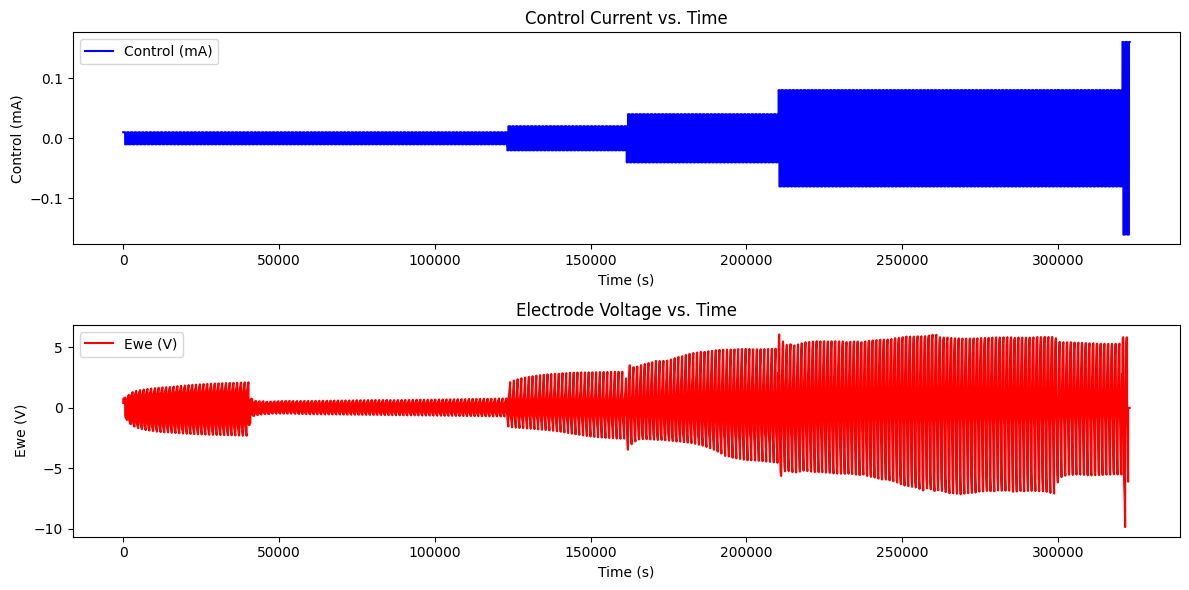

In [44]:
# Load data
mpr_file4 = fl.load_mpr("12to1-25%CNC-3%GQDs _C01.mpr")
df4 = pd.DataFrame(mpr_file4.data)

# Get columns
print("Columns:", df4.columns)
print("Data:", df4['time/s'].head())


# df4['time'] = df4.index
df4 = df4.set_index('time/s')[['control/mA', 'Ewe/V']]

print("Columns:", df4.columns)
print("Data:", df4.head())

# Plotting
plt.figure(figsize=(12, 6))

# Plot 'control/mA'
plt.subplot(2, 1, 1)
plt.plot(df4.index, df4['control/mA'], color='blue', label='Control (mA)')
plt.xlabel('Time (s)')
plt.ylabel('Control (mA)')
plt.title('Control Current vs. Time')
plt.legend()

# Plot 'Ewe/V'
plt.subplot(2, 1, 2)
plt.plot(df4.index, df4['Ewe/V'], color='red', label='Ewe (V)')
plt.xlabel('Time (s)')
plt.ylabel('Ewe (V)')
plt.title('Electrode Voltage vs. Time')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
charging_cycles = dp.find_charging_cycles(df4)

In [46]:
# Save all charging cycles to CSV files
for idx, cycle_df in enumerate(charging_cycles):
    cycle_df.to_csv(f'charging_cycle_{idx}.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'charging_cycle_0.csv'

In [ ]:
# # Example: Access charging cycle number 38
# cycle_38 = charging_cycles[38]

# # Do something with it, e.g., print or save
# print(cycle_38)

# # # Optional: Save it
# # cycle_38.to_csv('charging_cycle_38.csv', index=False)


In [ ]:
# # Access charging cycle number 38
# cycle_38 = charging_cycles[11]

# # Plot voltage and current over time
# plt.figure(figsize=(12, 6))

# # Plot voltage
# plt.subplot(2, 1, 1)
# plt.plot(cycle_38.index, cycle_38['Ewe/V'], label='Voltage (Ewe/V)', color='blue')
# plt.ylabel('Voltage (V)')
# plt.title('Charging Cycle 38')
# plt.grid(True)
# plt.legend()

# # Plot current
# plt.subplot(2, 1, 2)
# plt.plot(cycle_38.index, cycle_38['control/mA'], label='Current (control/mA)', color='green')
# plt.ylabel('Current (mA)')
# plt.xlabel('Time (s)')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
# # Specify the cycle indices you want to save
# selected_indices = [11, 38, 123, 200]

# # Save only the selected cycles to different sheets
# with pd.ExcelWriter("charging_cycles_selected.xlsx") as writer:
#     for idx in selected_indices:
#         if idx < len(charging_cycles):
#             charging_cycles[idx].to_excel(writer, sheet_name=f"cycle_{idx}", index=False)
#         else:
#             print(f"Cycle {idx} is out of range.")


In [ ]:
# Selected cycle indices to process
selected_indices = [11, 38, 123, 200]

# Dictionary to store processed (u, y) pairs
processed_data = {}

for idx in selected_indices:
    if idx < len(charging_cycles):
        cycle_df = charging_cycles[idx]
        
        # Convert to NumPy array (assuming first column is u, second is y)
        data = cycle_df.to_numpy()
        u = data[:, 0] - data[0, 0]
        y = data[:, 1] - data[0, 1]
        
        # Store results
        processed_data[idx] = {'u': u, 'y': y}
    else:
        print(f"Cycle {idx} is out of range.")


In [ ]:
u = processed_data[200]['u']
y = processed_data[200]['y']

In [ ]:
# data1 = pd.read_excel("C:/Users/Arne/OneDrive - University of Calgary/Documents/Data/charging_cycles_selected.xlsx",sheet_name="cycle_11",header=0).to_numpy()
# data2 = pd.read_excel("C:/Users/Arne/OneDrive - University of Calgary/Documents/Data/charging_cycles_selected.xlsx",sheet_name="cycle_38",header=0).to_numpy()
# data3 = pd.read_excel("C:/Users/Arne/OneDrive - University of Calgary/Documents/Data/charging_cycles_selected.xlsx",sheet_name="cycle_123",header=0).to_numpy()
# data4 = pd.read_excel("C:/Users/Arne/OneDrive - University of Calgary/Documents/Data/charging_cycles_selected.xlsx",sheet_name="cycle_200",header=0).to_numpy()
 
# u = data3[:,0]
# y = data3[:,1]
 
# u -= u[0]
# y -= y[0]

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:118: RuntimeWarning: overflow encountered in multiply
  suf = s * uf
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:112: RuntimeWarning: overflow encountered in square
  denom = s**2 + alpha
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:113: RuntimeWarning: invalid value encountered in divide
  p_norm = norm(suf / denom)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\opti

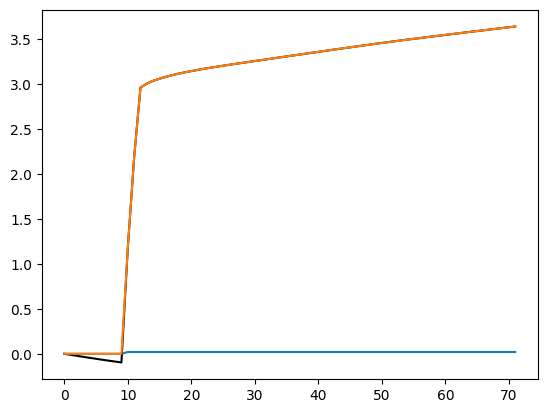

In [ ]:
# model orders, use output-error now
# n_oe = np.array([6,5,0])
n_oe = [6, 5, 0]
# n_oe = (6, 5, 0)
n_high_order_oe = 10
 
# only one function to get the estimated model
optimization_results_oe = sid.estimate_oe(n_oe,n_high_order_oe,y,u)
 
# convert theta to a trasfer function in order to simulate output
G_est, H_est = sid.theta_2_tf_oe(optimization_results_oe.x,n_oe,1)
 
# simulate output of model
tt,y_sim_est = ct.forced_response(G_est,U=u-u[0])
 
# make plot
fig,ax = plt.subplots(1)
ax.plot(u-u[0])
ax.plot(y-y[0],'k')
ax.plot(y_sim_est, label='est fir')